# Types of Conformal Prediction

## Mandatory Libraries

In [1]:
# #install OpenML
# !pip install nonconformist
# !pip install openml
# !pip install dtype_diet

# #install XGBoost
# !pip install xgboost
# !pip install --upgrade xgboost

# #install CatBoost
# !pip install catboost
# !pip install ipywidgets

In [2]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


### Loading Libraries

In [3]:
# Numerical Computing
import numpy as np

# Data Manipulation
import pandas as pd

#Dat Visualization
import plotly.express as px
import matplotlib.pyplot as plt

# SciPy
from scipy.stats import rankdata

#
import openml

#Scikit-Learn
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score, confusion_matrix

# Boosting Libraries
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Conformal Libraries
from nonconformist.cp import TcpClassifier
from nonconformist.nc import NcFactory
from nonconformist.nc import InverseProbabilityErrFunc, MarginErrFunc

In [4]:
%matplotlib inline

In [5]:
# Setting Warnings
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [6]:
datasets_df = openml.datasets.list_datasets(output_format="dataframe")
print(datasets_df.head(n=10))

datasets_df.set_index('did', inplace = True)

    did             name  version uploader  status format  MajorityClassSize  \
2     2           anneal        1        1  active   ARFF              684.0   
3     3         kr-vs-kp        1        1  active   ARFF             1669.0   
4     4            labor        1        1  active   ARFF               37.0   
5     5       arrhythmia        1        1  active   ARFF              245.0   
6     6           letter        1        1  active   ARFF              813.0   
7     7        audiology        1        1  active   ARFF               57.0   
8     8  liver-disorders        1        1  active   ARFF                NaN   
9     9            autos        1        1  active   ARFF               67.0   
10   10            lymph        1        1  active   ARFF               81.0   
11   11    balance-scale        1        1  active   ARFF              288.0   

    MaxNominalAttDistinctValues  MinorityClassSize  NumberOfClasses  \
2                           7.0                8

In [7]:
datasets_df.head()

,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
did,,,,,,,,,,,,,,,
2,anneal,1,1,active,ARFF,684.0,7.0,8.0,5.0,39.0,898.0,898.0,22175.0,6.0,33.0
3,kr-vs-kp,1,1,active,ARFF,1669.0,3.0,1527.0,2.0,37.0,3196.0,0.0,0.0,0.0,37.0
4,labor,1,1,active,ARFF,37.0,3.0,20.0,2.0,17.0,57.0,56.0,326.0,8.0,9.0
5,arrhythmia,1,1,active,ARFF,245.0,13.0,2.0,13.0,280.0,452.0,384.0,408.0,206.0,74.0
6,letter,1,1,active,ARFF,813.0,26.0,734.0,26.0,17.0,20000.0,0.0,0.0,16.0,1.0


In [8]:
datasets_df.query('NumberOfClasses == 2')

,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
did,,,,,,,,,,,,,,,
3,kr-vs-kp,1,1,active,ARFF,1669.0,3.0,1527.0,2.0,37.0,3196.0,0.0,0.0,0.0,37.0
4,labor,1,1,active,ARFF,37.0,3.0,20.0,2.0,17.0,57.0,56.0,326.0,8.0,9.0
13,breast-cancer,1,1,active,ARFF,201.0,11.0,85.0,2.0,10.0,286.0,9.0,9.0,0.0,10.0
15,breast-w,1,1,active,ARFF,458.0,2.0,241.0,2.0,10.0,699.0,16.0,16.0,9.0,1.0
24,mushroom,1,1,active,ARFF,4208.0,12.0,3916.0,2.0,23.0,8124.0,2480.0,2480.0,0.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46281,insurance_company,1,30703,active,arff,9236.0,NaN,586.0,2.0,86.0,9822.0,0.0,0.0,23.0,63.0
46282,internet_usage,2,30703,active,arff,7393.0,NaN,2715.0,2.0,69.0,10108.0,309.0,309.0,1.0,68.0
46298,electrical_grid_stability_simulated_classifica...,1,30703,active,arff,6380.0,NaN,3620.0,2.0,13.0,10000.0,0.0,0.0,12.0,1.0


In [9]:
# Data selection: retreiving information
datasets_df.loc[31]

name                                  credit-g
version                                      1
uploader                                     1
status                                  active
format                                    ARFF
MajorityClassSize                        700.0
MaxNominalAttDistinctValues               10.0
MinorityClassSize                        300.0
NumberOfClasses                            2.0
NumberOfFeatures                          21.0
NumberOfInstances                       1000.0
NumberOfInstancesWithMissingValues         0.0
NumberOfMissingValues                      0.0
NumberOfNumericFeatures                    7.0
NumberOfSymbolicFeatures                  14.0
Name: 31, dtype: object

### Understanding Classical Predictors
#### Applying TCP for Classification Problems

In [10]:
# Retreiving Data: German Credit Dataset -> https://www.openml.org/d/31
dataset = openml.datasets.get_dataset(31)

# Print a summary
print(
    f"This is dataset '{dataset.name}', the target feature is "
    f"'{dataset.default_target_attribute}'"
)
print(f"URL: {dataset.url}")
print(dataset.description[:500])

This is dataset 'credit-g', the target feature is 'class'
URL: https://api.openml.org/data/v1/download/31/credit-g.arff
**Author**: Dr. Hans Hofmann  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) - 1994    
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)

**German Credit dataset**  
This dataset classifies people described by a set of attributes as good or bad credit risks.

This dataset comes with a cost matrix: 
``` 
Good  Bad (predicted)  
Good   0    1   (actual)  
Bad    5    0  
```

It is worse to class a customer as good when they are 


In [11]:
# Placing Dataset
X, y, categorical_indicator, attribute_names = dataset.get_data(
    dataset_format="array", target=dataset.default_target_attribute
)

df = pd.DataFrame(X, columns=attribute_names)
df["class"] = y

In [12]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0.0,6.0,4.0,3.0,1169.0,4.0,4.0,4.0,2.0,0.0,...,0.0,67.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,0
1,1.0,48.0,2.0,3.0,5951.0,0.0,2.0,2.0,1.0,0.0,...,0.0,22.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0,1
2,3.0,12.0,4.0,6.0,2096.0,0.0,3.0,2.0,2.0,0.0,...,0.0,49.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,0
3,0.0,42.0,2.0,2.0,7882.0,0.0,3.0,2.0,2.0,2.0,...,1.0,45.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0,0
4,0.0,24.0,3.0,0.0,4870.0,0.0,2.0,3.0,2.0,0.0,...,3.0,53.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,1


In [13]:
df['class'].value_counts()

class
0    700
1    300
Name: count, dtype: int64

### Splitting Dataset: `Training` & `Test` sets

In [14]:
# Features
X = df.drop('class', axis = 1)

# Target Variable
y = df['class']

In [15]:
X.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,0.0,6.0,4.0,3.0,1169.0,4.0,4.0,4.0,2.0,0.0,4.0,0.0,67.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0
1,1.0,48.0,2.0,3.0,5951.0,0.0,2.0,2.0,1.0,0.0,2.0,0.0,22.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0
2,3.0,12.0,4.0,6.0,2096.0,0.0,3.0,2.0,2.0,0.0,3.0,0.0,49.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0
3,0.0,42.0,2.0,2.0,7882.0,0.0,3.0,2.0,2.0,2.0,4.0,1.0,45.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0
4,0.0,24.0,3.0,0.0,4870.0,0.0,2.0,3.0,2.0,0.0,4.0,3.0,53.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0


In [16]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: class, dtype: int64

#### Splitting Procedure

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Training on `Logistic Regression Classifier`

In [18]:
# Model Selection
model = LogisticRegression()

# Fitting Model
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
# Getting predictions 
y_pred_test = model.predict(X_test)

# Getting Class Score
y_pred_score_test = model.predict_proba(X_test)

In [20]:
print('Classification accuracy: {}'.format(accuracy_score(y_test, y_pred_test)))

Classification accuracy: 0.78


In [21]:
# Area under The Curve
print('ROC AUC: {}'.format(roc_auc_score(y_test, y_pred_score_test[:,1]))) 

ROC AUC: 0.7926190476190477


In [22]:
#Training Classification Scores
y_pred_score_train = model.predict_proba(X_train)

In [23]:
y_pred_score_train

array([[0.55710299, 0.44289701],
       [0.8285389 , 0.1714611 ],
       [0.51606421, 0.48393579],
       ...,
       [0.86374797, 0.13625203],
       [0.79055619, 0.20944381],
       [0.87198509, 0.12801491]])

In [24]:
y_train

828    1
997    0
148    0
735    0
130    0
      ..
492    0
545    1
298    0
417    0
749    0
Name: class, Length: 800, dtype: int64

In [25]:
x = X_test.iloc[0]
x

checking_status              1.0
duration                    18.0
credit_history               2.0
purpose                      9.0
credit_amount             1913.0
savings_status               3.0
employment                   1.0
installment_commitment       3.0
personal_status              3.0
other_parties                0.0
residence_since              3.0
property_magnitude           0.0
age                         36.0
other_payment_plans          0.0
housing                      1.0
existing_credits             1.0
job                          2.0
num_dependents               1.0
own_telephone                1.0
foreign_worker               0.0
Name: 30, dtype: float32

In [26]:
y = y_test.iloc[0]
y

0

In [27]:
y_pred_score_test[0]

array([0.79756885, 0.20243115])

### Non-Conformity Measure

```
Measure and quantify how different an object is from the other objects in the dataset
```

In [28]:
def InverseProbabilityNC(predicted_score, y):
  prob = np.zeros(y.size, dtype=np.float32)
  for i, y_ in enumerate(y):
    if y_ >= predicted_score.shape[1]:
      prob[i] = 0
    else:
      prob[i] = predicted_score[i, int(y_)]
  return 1 - prob

In [29]:
X_train

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
828,0.0,36.0,2.0,1.0,8335.0,4.0,4.0,3.0,2.0,0.0,4.0,3.0,47.0,2.0,2.0,1.0,2.0,1.0,0.0,0.0
997,3.0,12.0,2.0,3.0,804.0,0.0,4.0,4.0,2.0,0.0,4.0,2.0,38.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0
148,0.0,36.0,4.0,2.0,5371.0,0.0,2.0,3.0,2.0,2.0,2.0,1.0,28.0,2.0,1.0,2.0,2.0,1.0,0.0,0.0
735,1.0,36.0,1.0,4.0,3990.0,4.0,1.0,3.0,1.0,0.0,2.0,3.0,29.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
130,1.0,48.0,2.0,0.0,8487.0,4.0,3.0,1.0,1.0,0.0,2.0,2.0,24.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,3.0,6.0,4.0,3.0,1237.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,27.0,2.0,1.0,2.0,2.0,1.0,0.0,0.0
545,0.0,24.0,3.0,0.0,1333.0,0.0,0.0,4.0,2.0,0.0,2.0,0.0,43.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0
298,3.0,18.0,2.0,2.0,2515.0,0.0,2.0,3.0,2.0,0.0,4.0,0.0,43.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0
417,0.0,18.0,3.0,6.0,8471.0,4.0,2.0,1.0,1.0,0.0,2.0,2.0,23.0,2.0,0.0,2.0,2.0,1.0,1.0,0.0


In [30]:
# TCP from Training to Test sets
pd.DataFrame(X_test.iloc[0]).T

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
30,1.0,18.0,2.0,9.0,1913.0,3.0,1.0,3.0,3.0,0.0,3.0,0.0,36.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0


In [31]:
X_train_plus_test = pd.concat([X_train,pd.DataFrame(X_test.iloc[0]).T])

X_train_plus_test

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
828,0.0,36.0,2.0,1.0,8335.0,4.0,4.0,3.0,2.0,0.0,4.0,3.0,47.0,2.0,2.0,1.0,2.0,1.0,0.0,0.0
997,3.0,12.0,2.0,3.0,804.0,0.0,4.0,4.0,2.0,0.0,4.0,2.0,38.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0
148,0.0,36.0,4.0,2.0,5371.0,0.0,2.0,3.0,2.0,2.0,2.0,1.0,28.0,2.0,1.0,2.0,2.0,1.0,0.0,0.0
735,1.0,36.0,1.0,4.0,3990.0,4.0,1.0,3.0,1.0,0.0,2.0,3.0,29.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
130,1.0,48.0,2.0,0.0,8487.0,4.0,3.0,1.0,1.0,0.0,2.0,2.0,24.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,0.0,24.0,3.0,0.0,1333.0,0.0,0.0,4.0,2.0,0.0,2.0,0.0,43.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0
298,3.0,18.0,2.0,2.0,2515.0,0.0,2.0,3.0,2.0,0.0,4.0,0.0,43.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0
417,0.0,18.0,3.0,6.0,8471.0,4.0,2.0,1.0,1.0,0.0,2.0,2.0,23.0,2.0,0.0,2.0,2.0,1.0,1.0,0.0
749,3.0,15.0,2.0,1.0,3029.0,0.0,3.0,2.0,2.0,0.0,2.0,2.0,33.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0


In [32]:
y_pred_score_train

array([[0.55710299, 0.44289701],
       [0.8285389 , 0.1714611 ],
       [0.51606421, 0.48393579],
       ...,
       [0.86374797, 0.13625203],
       [0.79055619, 0.20944381],
       [0.87198509, 0.12801491]])

In [33]:
y_train_plus_test_0 = np.append(y_train, 0)

y_train_plus_test_1 = np.append(y_train, 1)

#### Fitting Model (0 & 1)

In [34]:
# Fitting Model
model.fit(X_train_plus_test, y_train_plus_test_0)

# Getting Prediction
y_pred_score_train_plus_test_0 = model.predict_proba(X_train_plus_test)

In [35]:
# Fitting Model
model.fit(X_train_plus_test, y_train_plus_test_1)

# Getting Prediction
y_pred_score_train_plus_test_1 = model.predict_proba(X_train_plus_test)

In [36]:
y_pred_score_train_plus_test_0

array([[0.55724625, 0.44275375],
       [0.83005962, 0.16994038],
       [0.51653014, 0.48346986],
       ...,
       [0.79240199, 0.20759801],
       [0.87268653, 0.12731347],
       [0.80126944, 0.19873056]])

In [37]:
y_pred_score_train_plus_test_1

array([[0.54682038, 0.45317962],
       [0.83736784, 0.16263216],
       [0.50261938, 0.49738062],
       ...,
       [0.79575933, 0.20424067],
       [0.87575672, 0.12424328],
       [0.78494481, 0.21505519]])

In [38]:
y_pred_score_train_plus_test_0[-1,:]

array([0.80126944, 0.19873056])

In [39]:
y_pred_score_train_plus_test_1[-1,:]

array([0.78494481, 0.21505519])

#### Non-Conformity Scores

In [40]:
# Test (0)
non_conformity_scores_train_plus_test_0 = InverseProbabilityNC(y_pred_score_train_plus_test_0, y_train_plus_test_0)

# Test (1)
non_conformity_scores_train_plus_test_1 = InverseProbabilityNC(y_pred_score_train_plus_test_1, y_train_plus_test_1)

In [41]:
non_conformity_scores_y_train_class_0 = non_conformity_scores_train_plus_test_0[:-1]
non_conformity_scores_y_train_class_1 = non_conformity_scores_train_plus_test_1[:-1]

non_conformity_scores_y_test_class_0 = non_conformity_scores_train_plus_test_0[-1]
non_conformity_scores_y_test_class_1 = non_conformity_scores_train_plus_test_1[-1]

#### P-Value Computing Function

```
1) Computes p-values for the test set using classical definition as per Vovk's book by essentiallycomparing the nonconformity score of the new test point

2) With the Non-Conformity scores of the points in the training set and computing ratio (with test point added to the same 'bag' as training points) of the # of training points that have nonconformity scores greater than equal to that of the new test point
```

In [42]:
def compute_p_value(non_conformity_scores_train, non_conformity_scores_test):
  p_values = []
  if not isinstance(non_conformity_scores_test, list):
    non_conformity_scores_test = [non_conformity_scores_test]

  for i, test_point_conformity_score in enumerate(non_conformity_scores_test):
    p_value = (np.sum(non_conformity_scores_train >= test_point_conformity_score) + 1) / (len(non_conformity_scores_train)+1)
    p_values.append(p_value)  
  return np.array(p_values)

In [43]:
p_value_class_0 = compute_p_value(non_conformity_scores_y_train_class_0, non_conformity_scores_y_test_class_0)

p_value_class_1 = compute_p_value(non_conformity_scores_y_train_class_1, non_conformity_scores_y_test_class_1)

In [44]:
print('p-value for class 0: {}, p-value for class 1: {}'.format(p_value_class_0,p_value_class_1))

p-value for class 0: [0.59925094], p-value for class 1: [0.0536829]


### Non-Conformity Outcomes

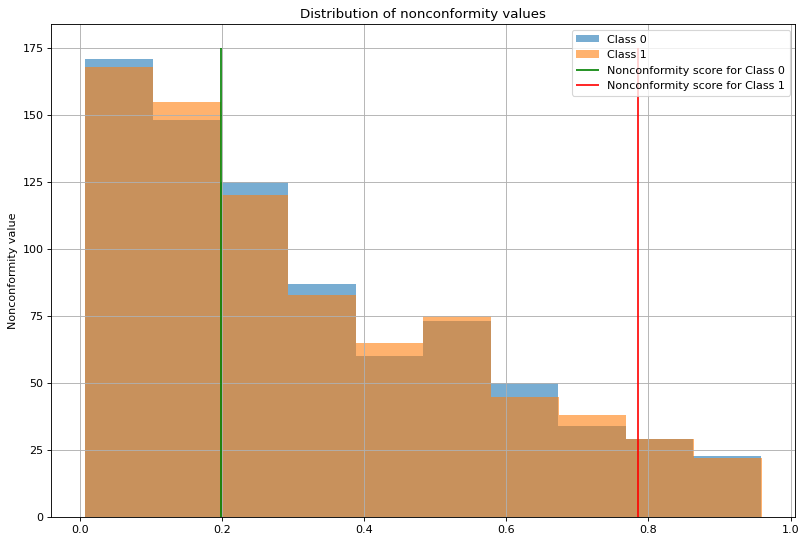

In [45]:
plt.figure(figsize=(12, 8), dpi=80)
plt.hist(np.sort(non_conformity_scores_y_train_class_0), label='Class 0', alpha=0.6)
plt.hist(np.sort(non_conformity_scores_y_train_class_1), label='Class 1', alpha=0.6)
# single line
plt.vlines(x = non_conformity_scores_y_test_class_0, ymin = 0, ymax = 175, colors = 'green',
           label = 'Nonconformity score for Class 0')

plt.vlines(x = non_conformity_scores_y_test_class_1, ymin = 0, ymax = 175, colors = 'red',
           label = 'Nonconformity score for Class 1')

plt.grid(True)
plt.ylabel('Nonconformity value')
plt.title('Distribution of nonconformity values')
 
plt.legend( loc='upper right')
plt.show()

In [46]:
def prediction_sets(X_train, y_train, X_test, y_test, model = LogisticRegression(), significance_level = 0.05):

    prediction_sets = []
    p_values_class_0 = []
    p_values_class_1 = []

    for i,y in enumerate(y_test):
      # Adding Test Point to The Training Set 
      X_train_plus_test = pd.concat([X_train,pd.DataFrame(X_test.iloc[i]).T])
      y_train_plus_test_0 = np.append(y_train, 0)
      y_train_plus_test_1 = np.append(y_train, 1)

      # Training The Underlying Classifier Twice - Two models for each potential value of the lable - 0 and 1
      model.fit(X_train_plus_test, y_train_plus_test_0)
      y_pred_score_train_plus_test_0 = model.predict_proba(X_train_plus_test)
      model.fit(X_train_plus_test, y_train_plus_test_1)
      y_pred_score_train_plus_test_1 = model.predict_proba(X_train_plus_test)

      #Computing nonconformity scores
      non_conformity_scores_train_plus_test_0 = InverseProbabilityNC(y_pred_score_train_plus_test_0, y_train_plus_test_0)
      non_conformity_scores_train_plus_test_1 = InverseProbabilityNC(y_pred_score_train_plus_test_1, y_train_plus_test_1)

      non_conformity_scores_y_train_class_0 = non_conformity_scores_train_plus_test_0[:-1]
      non_conformity_scores_y_train_class_1 = non_conformity_scores_train_plus_test_1[:-1]

      non_conformity_scores_y_test_class_0 = non_conformity_scores_train_plus_test_0[-1]
      non_conformity_scores_y_test_class_1 = non_conformity_scores_train_plus_test_1[-1]

      p_value_class_0 = compute_p_value(non_conformity_scores_y_train_class_0, non_conformity_scores_y_test_class_0)
      p_value_class_1 = compute_p_value(non_conformity_scores_y_train_class_1, non_conformity_scores_y_test_class_1)

      p_values_class_0.append( p_value_class_0)
      p_values_class_1.append( p_value_class_1)

      if (p_value_class_0 > significance_level) and (p_value_class_1 > significance_level):
        prediction_sets.append([True,True])
      elif (p_value_class_0 > significance_level) and (p_value_class_1 <= significance_level):
        prediction_sets.append([True,False])
      elif (p_value_class_0 <= significance_level) and (p_value_class_1 >significance_level):
        prediction_sets.append([False,True])
      else:  
        prediction_sets.append([False,False])

    return prediction_sets, p_values_class_0, p_values_class_1

In [48]:
predictions_test_sets, p_values_test_set_class_0, p_values_test_set_class_1 = prediction_sets(X_train, 
                                                                                              y_train, 
                                                                                              X_test, 
                                                                                              y_test, 
                                                                                              model = LogisticRegression(), 
                                                                                              significance_level = 0.05)

In [49]:
predictions_test_sets

[[True, True],
 [True, True],
 [True, True],
 [True, True],
 [True, True],
 [True, True],
 [True, True],
 [True, True],
 [True, True],
 [True, False],
 [True, False],
 [True, True],
 [True, False],
 [True, True],
 [True, True],
 [True, False],
 [True, True],
 [True, False],
 [True, False],
 [True, False],
 [True, False],
 [True, True],
 [True, False],
 [True, True],
 [True, True],
 [True, True],
 [True, False],
 [True, True],
 [True, False],
 [True, False],
 [True, False],
 [True, True],
 [True, False],
 [True, True],
 [True, True],
 [True, True],
 [True, True],
 [True, True],
 [True, True],
 [False, True],
 [True, True],
 [True, True],
 [True, False],
 [True, False],
 [True, False],
 [True, False],
 [True, True],
 [True, True],
 [True, False],
 [True, False],
 [True, False],
 [True, False],
 [True, True],
 [True, True],
 [True, True],
 [True, False],
 [True, False],
 [True, False],
 [True, True],
 [True, True],
 [True, False],
 [True, True],
 [True, True],
 [True, True],
 [True, False

In [50]:
# Default Non-Conformity Function
nc = NcFactory.create_nc(model,err_func=InverseProbabilityErrFunc())

# Setting Transductive Conformal Classifier
tcp = TcpClassifier(nc)	

In [51]:
# Fit the TCP using Training Set
tcp.fit(X_train, y_train)

In [52]:
# Produce Predictions for The Test Set, with confidence (95%)
prediction = tcp.predict(X_test.values, significance=0.05)

In [53]:
for i in range(len(predictions_test_sets)):
  print(predictions_test_sets[i], prediction[i, :])

[True, True] [ True  True]
[True, True] [ True  True]
[True, True] [ True  True]
[True, True] [ True  True]
[True, True] [ True  True]
[True, True] [ True  True]
[True, True] [ True  True]
[True, True] [ True  True]
[True, True] [ True  True]
[True, False] [ True False]
[True, False] [ True False]
[True, True] [ True  True]
[True, False] [ True False]
[True, True] [ True  True]
[True, True] [ True  True]
[True, False] [ True False]
[True, True] [ True  True]
[True, False] [ True False]
[True, False] [ True False]
[True, False] [ True False]
[True, False] [ True False]
[True, True] [ True  True]
[True, False] [ True False]
[True, True] [ True  True]
[True, True] [ True  True]
[True, True] [ True  True]
[True, False] [ True False]
[True, True] [ True  True]
[True, False] [ True False]
[True, False] [ True False]
[True, False] [ True False]
[True, True] [ True  True]
[True, False] [ True False]
[True, True] [ True  True]
[True, True] [ True  True]
[True, True] [ True  True]
[True, True] [

In [54]:
assert (predictions_test_sets, prediction)